<a href="https://colab.research.google.com/github/Consmart18/Debiasing-Student-Algorithms/blob/main/RQ3_Finding_optimal_time_for_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Research: Debiasing Algorithms for Student Progress Monitoring
### RQ 3: Finding the optimal time for prediction

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the data
projectdata_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project files/student_info_150.csv')

In [4]:
projectdata_df.head(3)

,gender,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,score_tma1,score_tma2,score_tma3,score_tma4,...,Reg_South West Region,Reg_Wales,Reg_West Midlands Region,Reg_Yorkshire Region,Edu_A Level or Equivalent,Edu_HE Qualification,Edu_Lower Than A Level,Edu_No Formal quals,Edu_Post Graduate Qualification,final_result
0,1,10.0,1,0,240,0,78.0,85.0,0.0,80.0,...,0,0,0,0,0,1,0,0,0,0
1,0,3.0,1,0,60,0,70.0,68.0,0.0,70.0,...,0,0,0,0,0,1,0,0,0,0
2,0,4.0,1,0,60,1,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,1


In [5]:
df = projectdata_df

## Model Building

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

df_30 = df.drop(['sum_interaction_60', 'sum_interaction_90', 'sum_interaction_120', 'sum_interaction_150', 'score_tma2', 'score_tma3', 'score_tma4', 'score_tma5'], axis=1)
df_60 = df.drop(['sum_interaction_90', 'sum_interaction_120', 'sum_interaction_150',
                 'score_tma3', 'score_tma4', 'score_tma5'], axis=1)
df_90 = df.drop(['sum_interaction_120', 'sum_interaction_150', 'score_tma4', 'score_tma5'], axis=1)
df_120 = df.drop(['sum_interaction_150', 'score_tma5'], axis=1)
df_150 = df

In [7]:
from sklearn.preprocessing import StandardScaler

def get_results(data):

  # Define target and features
  X = data.drop('final_result', axis=1)
  y = data['final_result']

  # Standardize the features
  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  # Split the data
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

  # Initialize the models
  lr = LogisticRegression(C=1, penalty='l2', solver='liblinear', max_iter=3000)
  rf = RandomForestClassifier(max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=200, random_state=42)
  gb = GradientBoostingClassifier(learning_rate=0.1, max_depth=4, min_samples_leaf=50, n_estimators=240, random_state=42)

  models = [lr, rf, gb]
  model_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']

  results = []

  # Train and evaluate the models
  for i in range(len(models)):
      models[i].fit(X_train, y_train)
      y_pred = models[i].predict(X_test)

      precision = precision_score(y_test, y_pred)
      recall = recall_score(y_test, y_pred)
      f1 = f1_score(y_test, y_pred)
      auc_roc = roc_auc_score(y_test, y_pred)
      accuracy = accuracy_score(y_test, y_pred)

      results.append([model_names[i], precision, recall, f1, auc_roc, accuracy])

  results_df = pd.DataFrame(results, columns=['Model', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC', 'Accuracy'])

  return results_df

In [8]:
get_results(df_30)

,Model,Precision,Recall,F1 Score,AUC-ROC,Accuracy
0,Logistic Regression,0.738957,0.716195,0.727398,0.716633,0.716609
1,Random Forest,0.779621,0.701085,0.738270,0.739732,0.737574
2,Gradient Boosting,0.786087,0.700504,0.740832,0.743666,0.741256


In [9]:
get_results(df_60)

,Model,Precision,Recall,F1 Score,AUC-ROC,Accuracy
0,Logistic Regression,0.841913,0.716002,0.773869,0.782827,0.779096
1,Random Forest,0.859753,0.729175,0.789099,0.798080,0.794232
2,Gradient Boosting,0.857016,0.747772,0.798676,0.804129,0.800982


In [10]:
get_results(df_90)

,Model,Precision,Recall,F1 Score,AUC-ROC,Accuracy
0,Logistic Regression,0.847021,0.757265,0.799632,0.802159,0.799652
1,Random Forest,0.891363,0.767726,0.824938,0.831545,0.827981
2,Gradient Boosting,0.884480,0.781674,0.829905,0.833753,0.830845


In [11]:
get_results(df_120)

,Model,Precision,Recall,F1 Score,AUC-ROC,Accuracy
0,Logistic Regression,0.867002,0.800659,0.832511,0.831655,0.829924
1,Random Forest,0.911918,0.812282,0.859221,0.862272,0.859480
2,Gradient Boosting,0.902730,0.819837,0.859289,0.860525,0.858253


In [12]:
get_results(df_150)

,Model,Precision,Recall,F1 Score,AUC-ROC,Accuracy
0,Logistic Regression,0.881802,0.838241,0.859470,0.856296,0.855287
1,Random Forest,0.937377,0.829330,0.880049,0.883686,0.880650
2,Gradient Boosting,0.927478,0.844828,0.884225,0.885477,0.883207


In [13]:
results_30 = get_results(df_30)
results_60 = get_results(df_60)
results_90 = get_results(df_90)
results_120 = get_results(df_120)
results_150 = get_results(df_150)

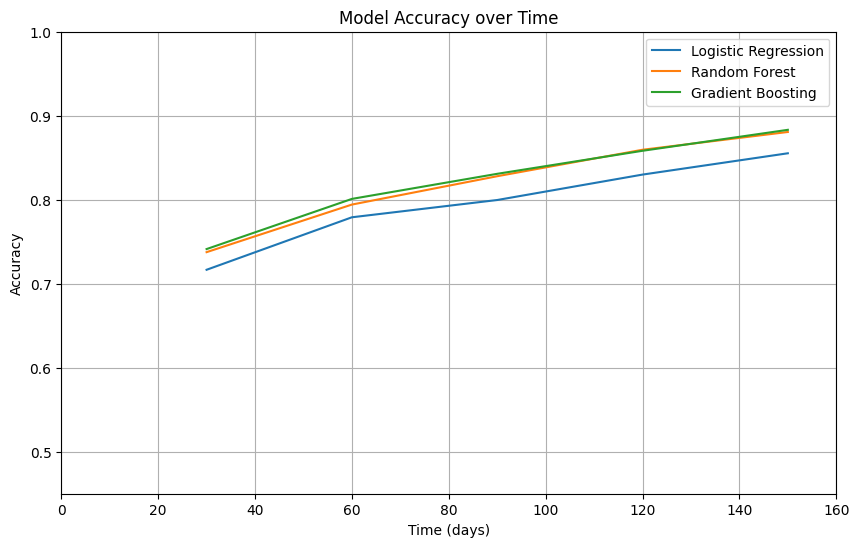

In [14]:
import matplotlib.pyplot as plt

time_points = [30, 60, 90, 120, 150]
model_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']

results = [results_30, results_60, results_90, results_120, results_150]

plt.figure(figsize=(10, 6))

for model in model_names:
    values = [df.loc[df['Model'] == model, 'Accuracy'].values[0] for df in results]
    plt.plot(time_points, values, label=model)

plt.title('Model Accuracy over Time')
plt.xlabel('Time (days)')
plt.ylabel('Accuracy')
plt.xlim(0, 160)
plt.ylim(0.45, 1)
plt.legend()
plt.grid(True)
plt.show()

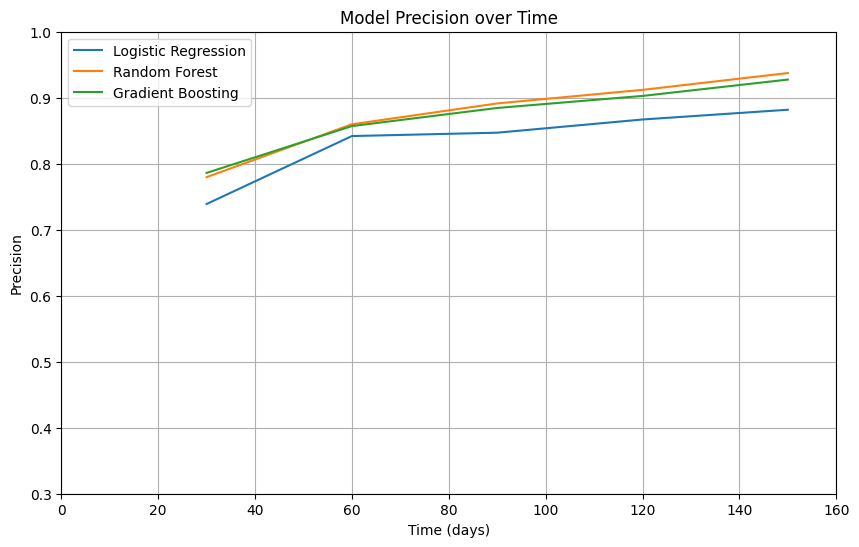

In [15]:
plt.figure(figsize=(10, 6))

for model in model_names:
    values = [df.loc[df['Model'] == model, 'Precision'].values[0] for df in results]
    plt.plot(time_points, values, label=model)

plt.title('Model Precision over Time')
plt.xlabel('Time (days)')
plt.ylabel('Precision')
plt.xlim(0, 160)
plt.ylim(0.3, 1)
plt.legend()
plt.grid(True)
plt.show()

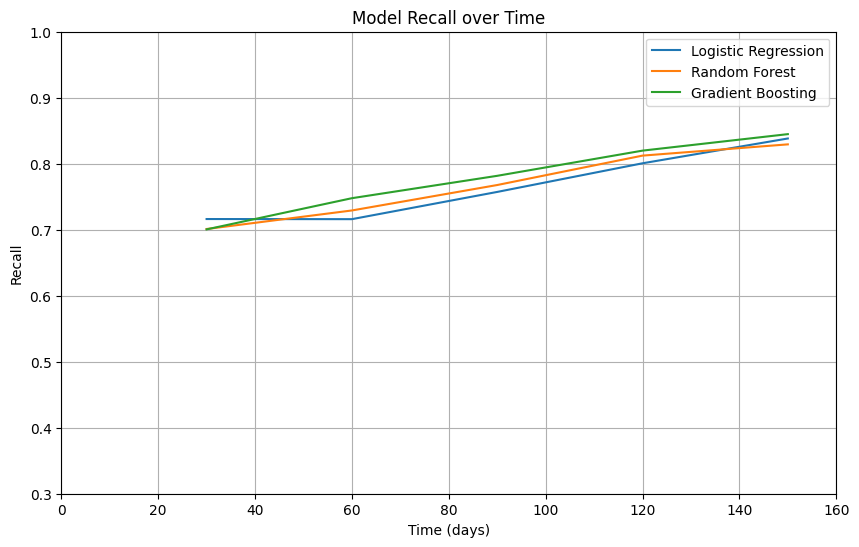

In [16]:
plt.figure(figsize=(10, 6))

for model in model_names:
    values = [df.loc[df['Model'] == model, 'Recall'].values[0] for df in results]
    plt.plot(time_points, values, label=model)

plt.title('Model Recall over Time')
plt.xlabel('Time (days)')
plt.ylabel('Recall')
plt.xlim(0, 160)
plt.ylim(0.3, 1)
plt.legend()
plt.grid(True)
plt.show()

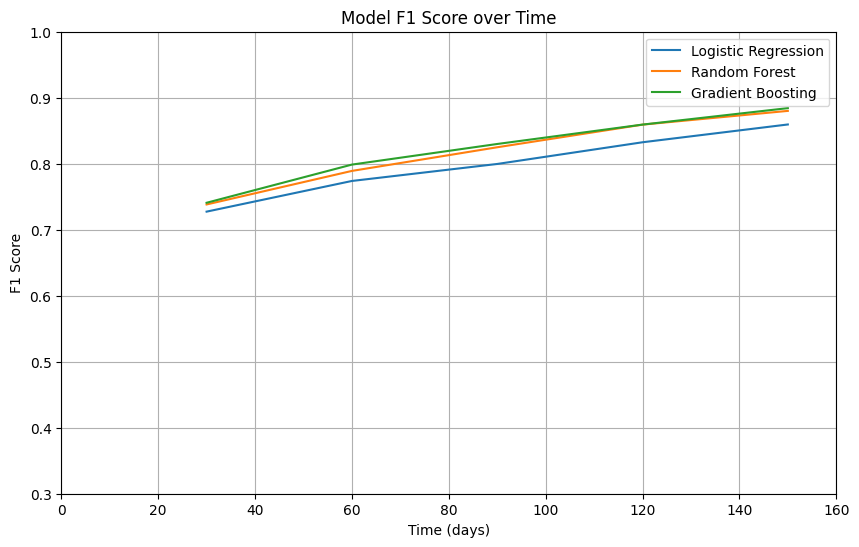

In [17]:
plt.figure(figsize=(10, 6))

for model in model_names:
    values = [df.loc[df['Model'] == model, 'F1 Score'].values[0] for df in results]
    plt.plot(time_points, values, label=model)

plt.title('Model F1 Score over Time')
plt.xlabel('Time (days)')
plt.ylabel('F1 Score')
plt.xlim(0, 160)
plt.ylim(0.3, 1)
plt.legend()
plt.grid(True)
plt.show()

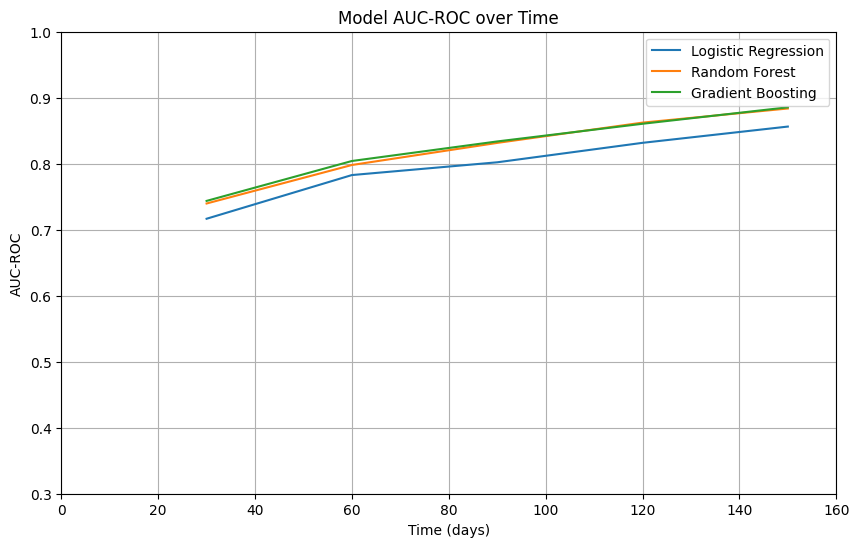

In [18]:
plt.figure(figsize=(10, 6))

for model in model_names:
    values = [df.loc[df['Model'] == model, 'AUC-ROC'].values[0] for df in results]
    plt.plot(time_points, values, label=model)

plt.title('Model AUC-ROC over Time')
plt.xlabel('Time (days)')
plt.ylabel('AUC-ROC')
plt.xlim(0, 160)
plt.ylim(0.3, 1)
plt.legend()
plt.grid(True)
plt.show()

### Choosing the Optimal Time using OTI

In [ ]:
import pandas as pd
import numpy as np

# Define data
data = {
    'Day': [30, 60, 90, 120, 150],
    'LR_Precision': [0.738957, 0.841913, 0.847021, 0.867002, 0.881802],
    'LR_Recall': [0.716195, 0.716002, 0.757265, 0.800659, 0.838241],
    'RF_Precision': [0.779621, 0.859753, 0.891363, 0.911918, 0.937377],
    'RF_Recall': [0.701085, 0.729175, 0.767726, 0.812282, 0.82933],
    'GB_Precision': [0.786087, 0.857016, 0.88448, 0.90273, 0.927478],
    'GB_Recall': [0.700504, 0.747772, 0.781674, 0.819837, 0.844828]
}

# Convert to DataFrame
df = pd.DataFrame(data)

models = ['LR', 'RF', 'GB']

# Normalize 'Day' in reverse based on module average duration of 255 days
df['Day_normalized'] = 1 - (df['Day'] / 255)

# Calculate the scores
for model in models:
    df[model + '_Day_Score'] = df['Day_normalized']
    df[model + '_Recall_Score'] = df[model + '_Recall']
    df[model + '_Precision_Score'] = df[model + '_Precision']

    df[model + '_Final_Score'] = 0.4 * df[model + '_Precision_Score'] + 0.35 * df[model + '_Recall_Score'] + 0.25 * df['Day_normalized']

# Print optimal time for each model and the DataFrame
for model in models:
    optimal_time = df.loc[df[model + '_Final_Score'].idxmax()]['Day']
    print(f"\nOptimal time for {model}: Day {optimal_time}")

    display(df[['Day', 'Day_normalized', model + '_Recall', model + '_Precision', model + '_Day_Score', model + '_Recall_Score', model + '_Precision_Score', model + '_Final_Score']].rename(columns={
        'Day_normalized': 'Day Normalized',
        model + '_Recall': 'Recall',
        model + '_Precision': 'Precision',
        model + '_Day_Score': 'Day Score',
        model + '_Recall_Score': 'Recall Score',
        model + '_Precision_Score': 'Precision Score',
        model + '_Final_Score': 'Final Score'
    }).style.hide(axis="index").format(precision=5).set_table_styles([{
        'selector': 'th',
        'props': [('border', '1px solid black')]
    }, {
        'selector': 'td',
        'props': [('border', '1px solid black')]
    }]))


Optimal time for LR: Day 60.0


Day,Day Normalized,Recall,Precision,Day Score,Recall Score,Precision Score,Final Score
30,0.88235,0.71620,0.73896,0.88235,0.71620,0.73896,0.76684
60,0.76471,0.71600,0.84191,0.76471,0.71600,0.84191,0.77854
90,0.64706,0.75726,0.84702,0.64706,0.75726,0.84702,0.76562
120,0.52941,0.80066,0.86700,0.52941,0.80066,0.86700,0.75938
150,0.41176,0.83824,0.88180,0.41176,0.83824,0.88180,0.74905



Optimal time for RF: Day 60.0


Day,Day Normalized,Recall,Precision,Day Score,Recall Score,Precision Score,Final Score
30,0.88235,0.70108,0.77962,0.88235,0.70108,0.77962,0.77782
60,0.76471,0.72918,0.85975,0.76471,0.72918,0.85975,0.79029
90,0.64706,0.76773,0.89136,0.64706,0.76773,0.89136,0.78701
120,0.52941,0.81228,0.91192,0.52941,0.81228,0.91192,0.78142
150,0.41176,0.82933,0.93738,0.41176,0.82933,0.93738,0.76816



Optimal time for GB: Day 60.0


Day,Day Normalized,Recall,Precision,Day Score,Recall Score,Precision Score,Final Score
30,0.88235,0.70050,0.78609,0.88235,0.70050,0.78609,0.78020
60,0.76471,0.74777,0.85702,0.76471,0.74777,0.85702,0.79570
90,0.64706,0.78167,0.88448,0.64706,0.78167,0.88448,0.78914
120,0.52941,0.81984,0.90273,0.52941,0.81984,0.90273,0.78039
150,0.41176,0.84483,0.92748,0.41176,0.84483,0.92748,0.76962


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

def get_results(data):
    # Define target and features
    X = data.drop('final_result', axis=1)
    y = data['final_result']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize the models
    lr = LogisticRegression(max_iter=3000)
    rf = RandomForestClassifier()
    gb = GradientBoostingClassifier()

    models = [rf, gb]
    model_names = ['Random Forest', 'Gradient Boosting']

    results = []

    # Hyperparameter grids

    rf_param_grid = {
        'n_estimators': [100, 200, 300, 400],
        'max_depth': [None, 5, 10, 15, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    gb_param_grid = {
        'n_estimators': [100, 200, 300, 400],
        'learning_rate': [0.1, 0.05, 0.02, 0.01],
        'max_depth': [4, 6, 8],
        'min_samples_leaf': [20, 50, 100, 150]
    }

    param_grids = [rf_param_grid, gb_param_grid]

    # Train and evaluate the models
    for i in range(len(models)):
        grid_search = GridSearchCV(estimator=models[i], param_grid=param_grids[i], cv=3)
        grid_search.fit(X_train_scaled, y_train)

        best_estimator = grid_search.best_estimator_
        y_pred = best_estimator.predict(X_test_scaled)

        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc_roc = roc_auc_score(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)

        best_params = grid_search.best_params_

        results.append([model_names[i], accuracy, best_params])

    results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Best Parameters'])

    print(best_params)

    return results_df
